**문제** : 캔 와인의 와인 종류 표시 누락!<br>
==> 도수,당도, ph 값으로 분류~~

# 결정트리

: **로지스틱 회귀**

In [16]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine-date')
wine.head()
#class : 0 = 레드와인, 1 = 화이트 와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [18]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [19]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [22]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,test_size=0.2, random_state=42)

In [23]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


**train_test_split()** 의 기본 설정 값은 25%를 테스트 세트로, <br>
test_size = 0.2로 20% 정도 샘플로 테스트 세트를 만듬

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled =  ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 두 세트 모두 낮아 과소접합됨

0.7808350971714451
0.7776923076923077


In [26]:
print(lr.coef_, lr.intercept_) #로지스틱 회귀가 합습한 계수와 절편

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


홍선배가 보고서를 이해하기 어렵다고 하네요~~ <br>
**결정 트리** 모델로 쉽게 만들어 보자~~

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 조금 많이 과대접합됨 ㅠㅠ

0.996921300750433
0.8592307692307692


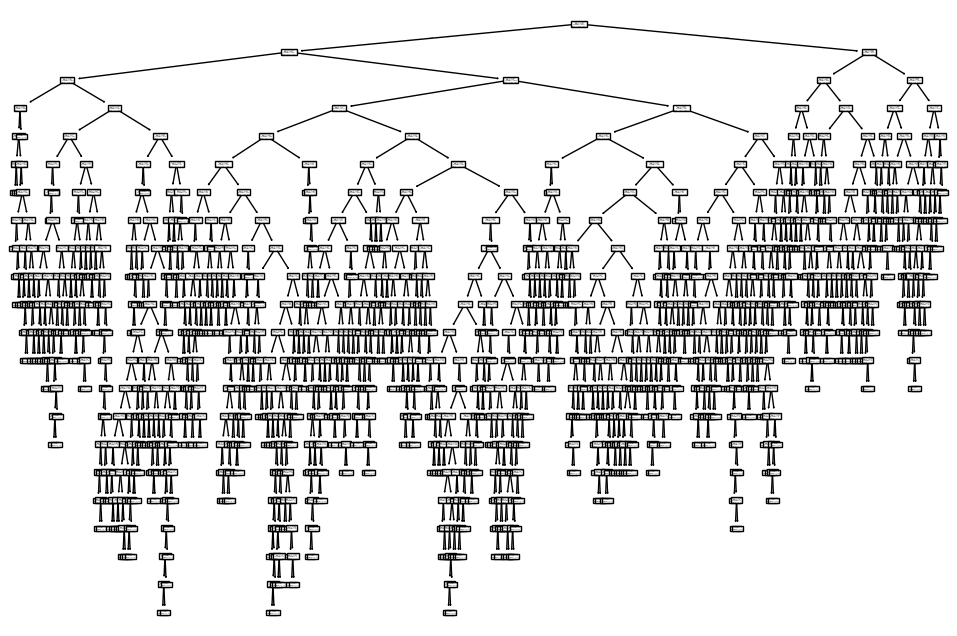

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt)
plt.show()

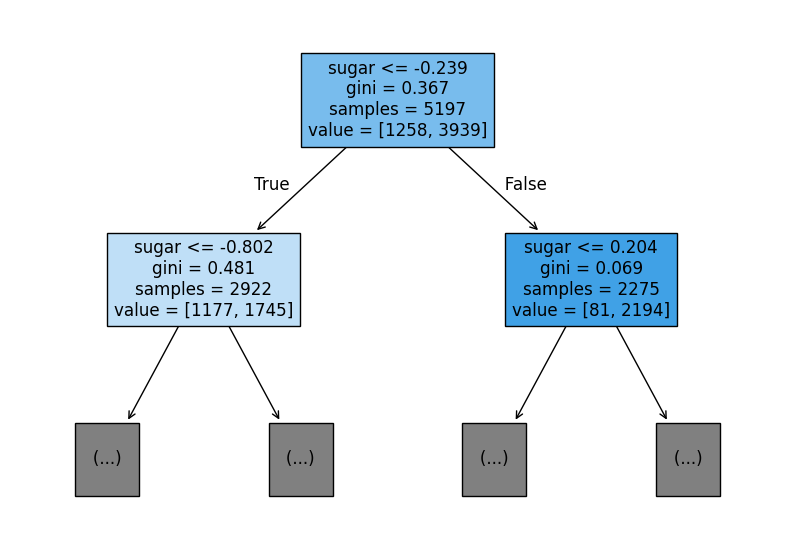

In [29]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

gini(**지니 불순도**) : 데이터를 분할하는 기준을 정하는 것 ##나중에 보충<br>
**정보 이득** : 부모와 자식 노드 사이의 불순도 차#

**가지치기**

In [30]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


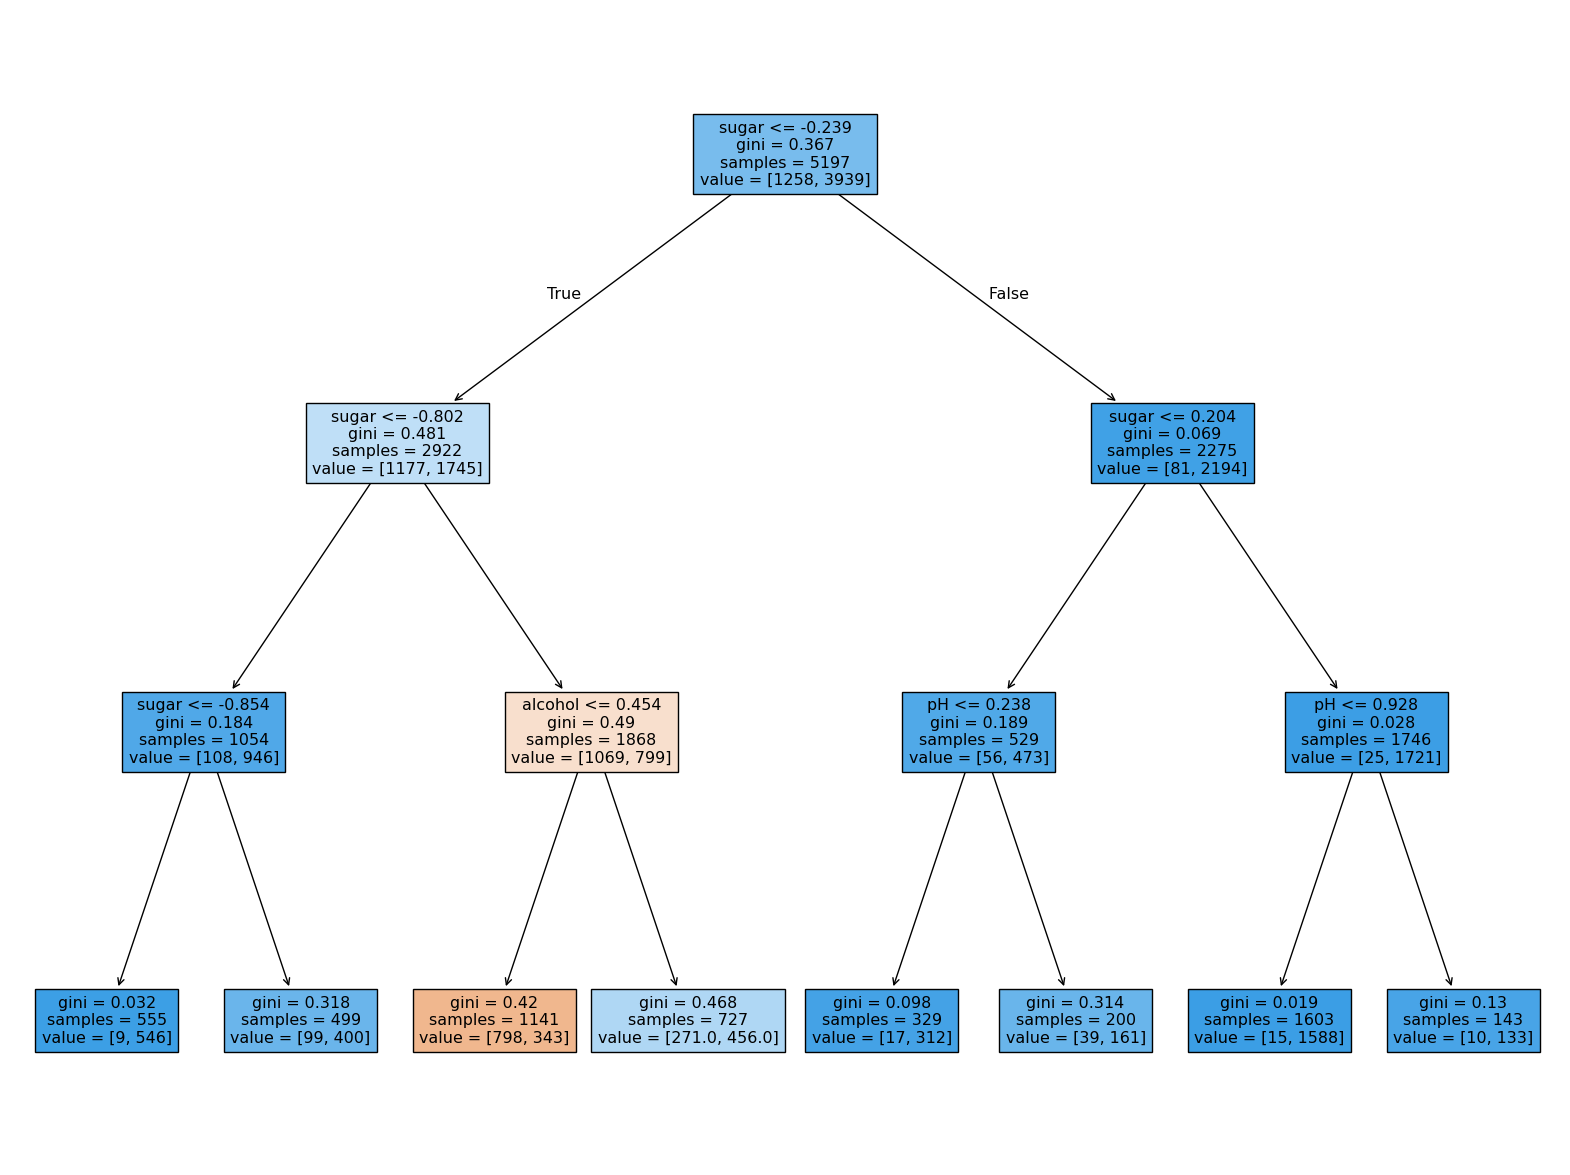

In [32]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [35]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


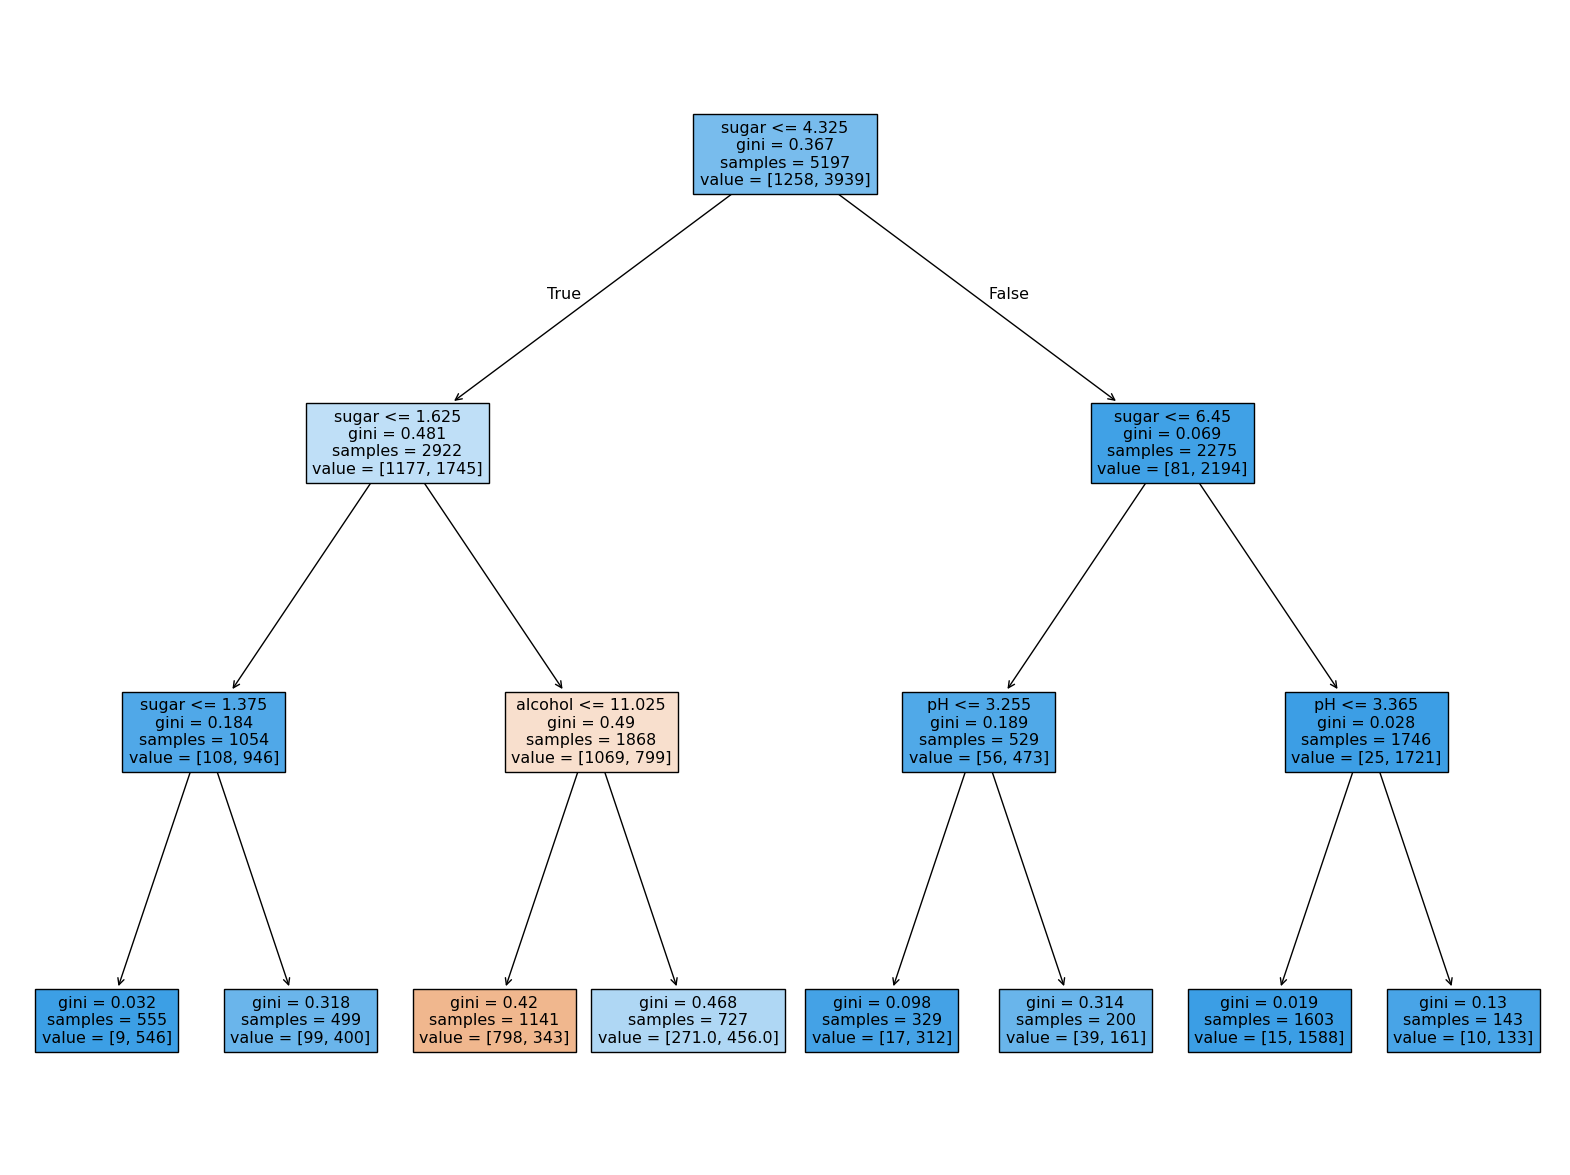

In [36]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [37]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# 교차 검증과 그리드 서치

너무 테스트세트에 의존했어~~~ 안돼ㅐ~~~<br>
검증세트를 추가로 만들어서 평가, 테스트 세트는 마지막에 한번 만 ~~~~~

In [38]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine-date')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [41]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
sub_input, val_input, sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


***교차검증** 중 3-폴드 교차 검증

In [44]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0100131 , 0.0111382 , 0.00793099, 0.00840211, 0.00854611]), 'score_time': array([0.00279379, 0.00073385, 0.00074005, 0.00089288, 0.00065804]), 'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [45]:
import numpy as np
print(np.mean(scores['test_score']))

0.8554925223957948


In [47]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8554925223957948
